In [ ]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.graphics.factorplots import interaction_plot
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import chi2_contingency
from scipy.stats import ttest_ind 
from scipy.stats import shapiro
from scipy.stats import anderson
from scipy.stats import levene
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
from statsmodels.graphics.factorplots import interaction_plot
import matplotlib.pyplot as plt 
pd.options.display.max_columns = None

from google.colab import drive
# drive.mount('/content/drive')
# Load the CSV file into a pandas dataframe
# csv_path = "/content/drive/My Drive/Arrests_and_Strip_Searches_(RBDC-ARR-TBL-001).csv"
dataset = pd.read_csv("https://raw.githubusercontent.com/shionguha/inf2178-expdesignfordatascience-w23/main/project%20dataset/Arrests_and_Strip_Searches_(RBDC-ARR-TBL-001).csv")
df = dataset.copy()

Research Question 1
# Does gender and race affect the amount of times a person is arrested?



Research Question 2
# Does race and occurance type affect the amount of times a person is stripsearched?


# EDA

# Data Cleaning

In [ ]:
#Drop unused columns 
df = df.drop(columns=['Arrest_Year', 'Arrest_Month', 'EventID', 
                      'ArrestLocDiv', 'Actions_at_arrest___Concealed_i', 'Actions_at_arrest___Combative__', 'Actions_at_arrest___Resisted__d', 
                      'Actions_at_arrest___Mental_inst', 'Actions_at_arrest___Assaulted_o', 'Actions_at_arrest___Cooperative', 'ItemsFound', 'ObjectId'])


In [ ]:
#Drop U since it skews with our model and have only 9 observations (outliers)
df = df.drop(df[df['Sex'] == 'U'].index)

In [ ]:
#Recode Age
df['Age_group__at_arrest_'] = df['Age_group__at_arrest_'].replace('Aged 65 and older', 'Aged 65 years and older')
df['Age_group__at_arrest_'] = df['Age_group__at_arrest_'].replace('Aged 17 years and under', 'Aged 17 years and younger')


In [ ]:
#Organizing crimes into Assualt, Aggrevated Assault, Non Violence, Compliance and others
df['Occurrence_Category'] = df['Occurrence_Category'].replace('Assault & Other crimes against persons', 'Assault')
df['Occurrence_Category'] = df['Occurrence_Category'].replace('Drug Related', 'Assault')
df['Occurrence_Category'] = df['Occurrence_Category'].replace('Harassment/Threatening', 'Assault')
df['Occurrence_Category'] = df['Occurrence_Category'].replace('Harassment & Threatening', 'Assault')
df['Occurrence_Category'] = df['Occurrence_Category'].replace('Break & Enter', 'Assault')
df['Occurrence_Category'] = df['Occurrence_Category'].replace('Break and Enter', 'Assault')
df['Occurrence_Category'] = df['Occurrence_Category'].replace('Robbery/Theft', 'Assault')
df['Occurrence_Category'] = df['Occurrence_Category'].replace('Robbery & Theft', 'Assault')

df['Occurrence_Category'] = df['Occurrence_Category'].replace('Weapons', 'Aggrevated Assault')
df['Occurrence_Category'] = df['Occurrence_Category'].replace('Weapons & Homicide', 'Aggrevated Assault')
df['Occurrence_Category'] = df['Occurrence_Category'].replace('Sexual Related Crime', 'Aggrevated Assault')
df['Occurrence_Category'] = df['Occurrence_Category'].replace('Sexual Related Crimes & Crimes Against Children', 'Aggrevated Assault')
df['Occurrence_Category'] = df['Occurrence_Category'].replace('Homicide', 'Aggrevated Assault')
df['Occurrence_Category'] = df['Occurrence_Category'].replace('Crimes against Children', 'Aggrevated Assault')

df['Occurrence_Category'] = df['Occurrence_Category'].replace('Vehicle Related', 'Vehicle Related (inc. Impaired)')
df['Occurrence_Category'] = df['Occurrence_Category'].replace('Impaired', 'Vehicle Related (inc. Impaired)')

df['Occurrence_Category'] = df['Occurrence_Category'].replace('FTA/FTC/Compliance Check/Parollee', 'Compliance')
df['Occurrence_Category'] = df['Occurrence_Category'].replace('FTA/FTC, Compliance Check & Parollee', 'Compliance')
df['Occurrence_Category'] = df['Occurrence_Category'].replace('Police Category - Administrative', 'Compliance')
df['Occurrence_Category'] = df['Occurrence_Category'].replace('Other Statute & Other Incident Type', 'Compliance')
df['Occurrence_Category'] = df['Occurrence_Category'].replace('Other Offence', 'Compliance')
df['Occurrence_Category'] = df['Occurrence_Category'].replace('LLA', 'Compliance')
df['Occurrence_Category'] = df['Occurrence_Category'].replace('Police Category - Incident', 'Compliance')

df['Occurrence_Category'] = df['Occurrence_Category'].replace('Mischief', 'Mischief & Fraud')
df['Occurrence_Category'] = df['Occurrence_Category'].replace('Fraud', 'Mischief & Fraud')

df['Occurrence_Category'] = df['Occurrence_Category'].replace('Mental Health', 'Other Statute')

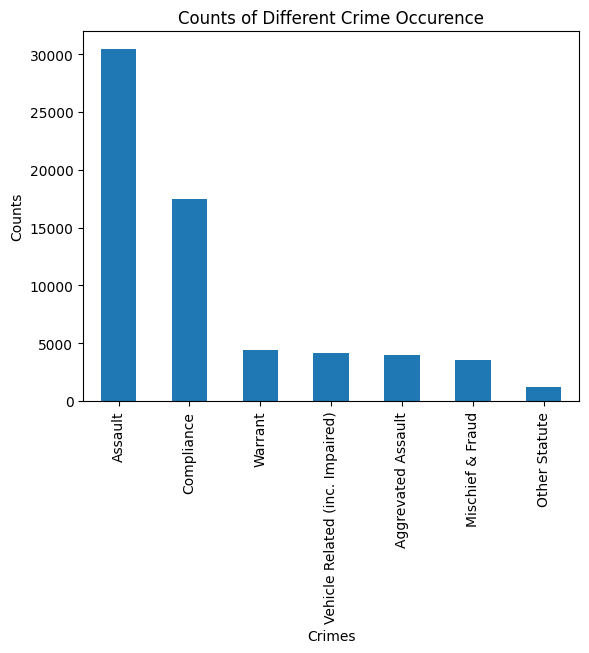

Assault                            30441
Compliance                         17473
Warrant                             4384
Vehicle Related (inc. Impaired)     4107
Aggrevated Assault                  3986
Mischief & Fraud                    3528
Other Statute                       1183
Name: Occurrence_Category, dtype: int64


In [ ]:
#Plot Histogram for Occurrence Category
Occurrence_Category_counts = df['Occurrence_Category'].value_counts()
Occurrence_Category_counts.plot(kind='bar')
plt.xlabel('Crimes')
plt.ylabel('Counts')
plt.title('Counts of Different Crime Occurence')
plt.show()
print(Occurrence_Category_counts)

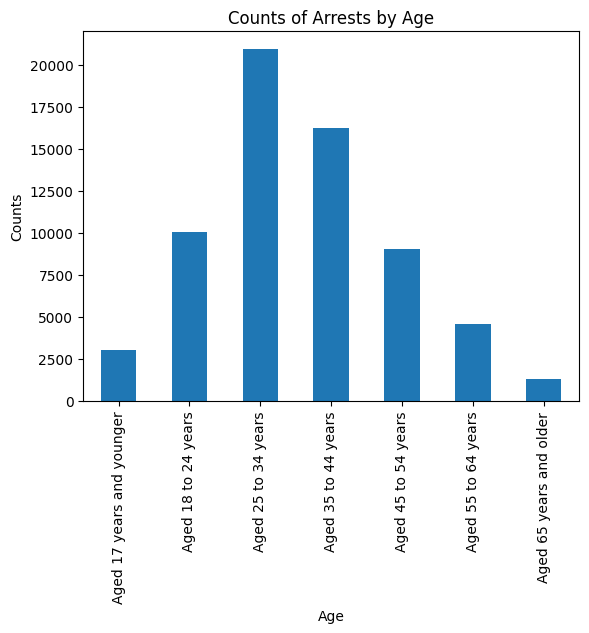

In [ ]:
#Plot histogram for age counts 
age_counts = df['Age_group__at_arrest_'].value_counts()
# sort the values in ascending order
age_counts_sorted = age_counts.reindex(['Aged 17 years and younger','Aged 18 to 24 years','Aged 25 to 34 years','Aged 35 to 44 years','Aged 45 to 54 years','Aged 55 to 64 years','Aged 65 years and older'])
# create a bar chart with the sorted values
age_counts_sorted.plot(kind='bar')
plt.xlabel('Age')
plt.ylabel('Counts')
plt.title('Counts of Arrests by Age')
plt.show()

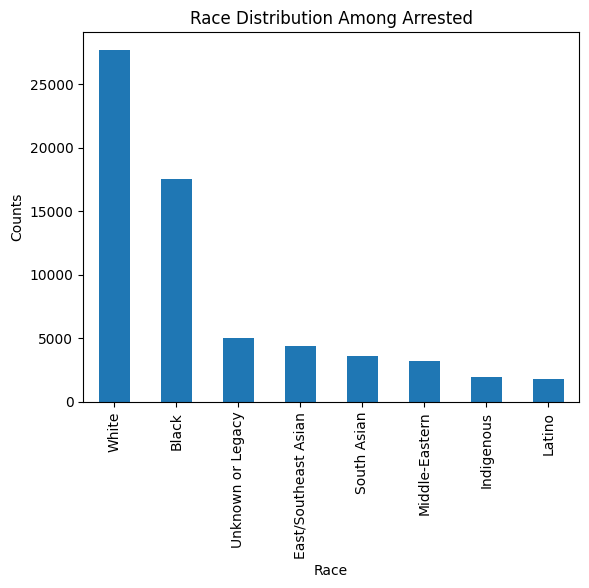

White                   27718
Black                   17526
Unknown or Legacy        5053
East/Southeast Asian     4415
South Asian              3613
Middle-Eastern           3237
Indigenous               1934
Latino                   1767
Name: Perceived_Race, dtype: int64


In [ ]:
#We want to investigate the amount of arrests made between different Races
race_counts = df['Perceived_Race'].value_counts()
race_counts.plot(kind='bar')
plt.xlabel('Race')
plt.ylabel('Counts')
plt.title('Race Distribution Among Arrested')
plt.show()
print(race_counts)

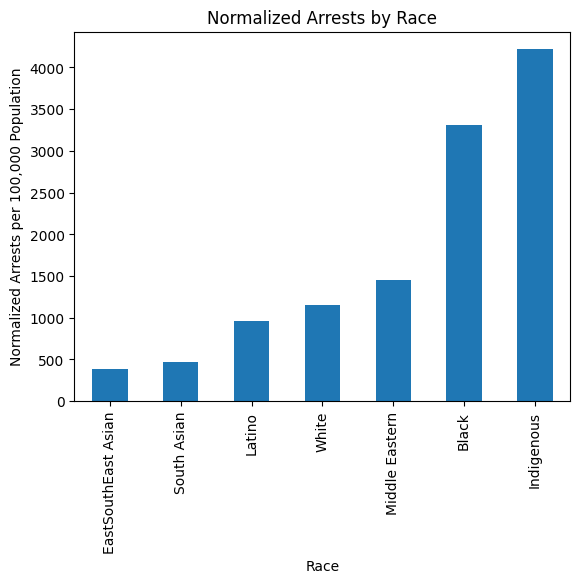

In [ ]:
#Using data complied from wikipedia, we want to discover the per 100,000 person arrest rate 
Normalized_White_Arrest = (27723/1201075)*100000/2
Normalized_Black_Arrest = (17526/265005)*100000/2
Normalized_EastSouthEast_Asian_Arrest = (4415/575885)*100000/2
Normalized_South_Asian_Arrest = (3613/385440)*100000/2
Normalized_Middle_Eastern_Arrest = (3237/111360)*100000/2
Normalized_Indigenous_Arrest = (1934/22925)*100000/2
Normalized_Latino_Arrest = (1768/92455)*100000/2
#Create normalized data 
Normalized_Race_Data = {'Race': ['EastSouthEast Asian', 'South Asian', 'Latino','White', 'Middle Eastern' ,'Black', 'Indigenous'],
        'Normalized Arrests': [Normalized_EastSouthEast_Asian_Arrest, Normalized_South_Asian_Arrest, Normalized_Latino_Arrest,Normalized_White_Arrest, 
                               Normalized_Middle_Eastern_Arrest,Normalized_Black_Arrest, Normalized_Indigenous_Arrest, ]}
NRD = pd.DataFrame(Normalized_Race_Data)

normalizedplot = NRD.plot(kind='bar', x='Race', y='Normalized Arrests', legend=False)

# add labels and title
normalizedplot.set_xlabel('Race')
normalizedplot.set_ylabel('Normalized Arrests per 100,000 Population')
normalizedplot.set_title('Normalized Arrests by Race')

# show the plot
plt.show()

In [ ]:
#Using PersonID, we create a total arrest column, documenting the arrest count of each individual
df['TotalArrests'] = df.groupby('PersonID').PersonID.transform('count')

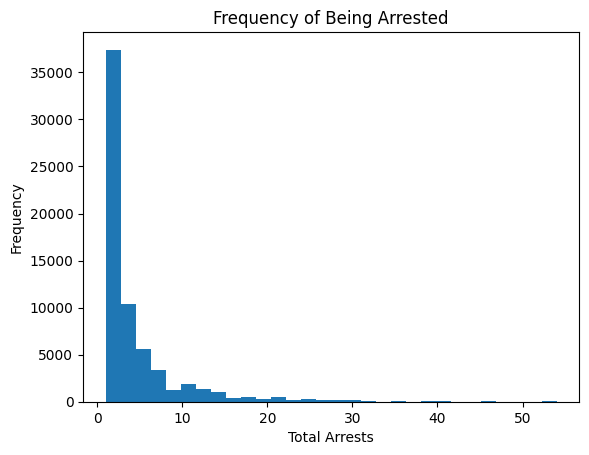

In [ ]:
#Plot histogram of Total Arrests
plt.hist(df['TotalArrests'], bins=30)
plt.xlabel('Total Arrests')
plt.ylabel('Frequency')
plt.title('Frequency of Being Arrested')
df.dropna(subset=['TotalArrests'], inplace=True)
df['TotalArrests'] = pd.to_numeric(df['TotalArrests'], errors='coerce')
df = df.drop(df[df['TotalArrests'] == 'nan'].index)

In [ ]:
#Total Arrest Anderson Darling Test
total_arrests = df['TotalArrests']
result = anderson(total_arrests)
print('Statistic:', result.statistic)
print('Critical Values:', result.critical_values)
print('Significance Level:', result.significance_level)

Statistic: 7688.610529755155
Critical Values: [0.576 0.656 0.787 0.918 1.092]
Significance Level: [15.  10.   5.   2.5  1. ]


In [ ]:
#We want to see if there are any bias in the number of strip search conducted 
df_strip_search = df[df['StripSearch'] == 1].groupby('PersonID').agg({'StripSearch': 'sum', 'Perceived_Race': 'first', 'Occurrence_Category': 'first'})
print(df_strip_search)

          StripSearch     Perceived_Race Occurrence_Category
PersonID                                                    
300003              1              White    Mischief & Fraud
300007              1        South Asian          Compliance
300015              1  Unknown or Legacy             Assault
300036              2              Black             Assault
300043              2              White             Warrant
...               ...                ...                 ...
337327              1        South Asian             Assault
337328              3        South Asian             Assault
337338              2              White             Assault
337341              2              White             Warrant
337344              1              Black  Aggrevated Assault

[5046 rows x 3 columns]


In [ ]:
stripsearch_data_total = df_strip_search['StripSearch']
result = anderson(stripsearch_data_total)
print('Statistic:', result.statistic)
print('Critical Values:', result.critical_values)
print('Significance Level:', result.significance_level)

Statistic: 891.6626589417447
Critical Values: [0.576 0.655 0.786 0.917 1.091]
Significance Level: [15.  10.   5.   2.5  1. ]




```
# This is formatted as code
```

## Two Sample T Test 1
Race & Total Arrest

In [ ]:
# separate the samples based on race
race_white = df[df['Perceived_Race'] == 'White']['TotalArrests']
race_indigenous = df[df['Perceived_Race'] == 'Indigenous']['TotalArrests']

In [ ]:
# Using levene test to check equal varaince
stat, p = levene(race_white,race_indigenous)
p
#Small p-value suggest not equal variance

3.475019136286763e-56

In [ ]:
# conduct the two-sample t-test
t_stat, p_value = ttest_ind(race_white, race_indigenous, equal_var=False)

# print the results
print("t-statistic: ", t_stat)
print("p-value: ", p_value)

t-statistic:  -15.421141421132969
p-value:  7.54377686889691e-51


<Figure size 2000x1600 with 0 Axes>

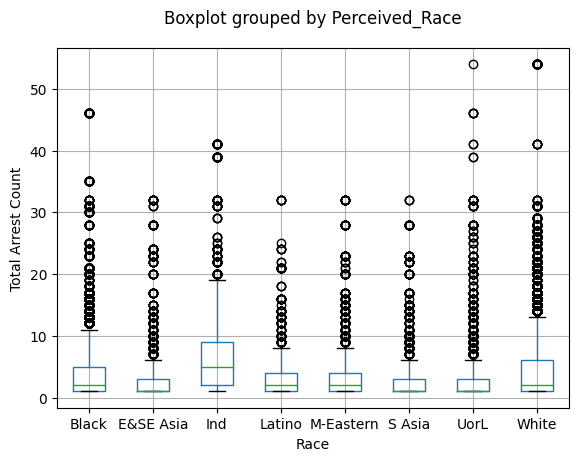

In [ ]:
#Create Box Plot for Arrest between different races 
RaceArrest = df[['Perceived_Race', 'TotalArrests']]
plt.figure(figsize=(20, 16))
RaceArrest.boxplot(by='Perceived_Race')
plt.xlabel('Race')
plt.ylabel('Total Arrest Count')
plt.title('')
plt.xticks(ticks=[1,2,3,4,5,6,7,8], labels=['Black','E&SE Asia','Ind','Latino','M-Eastern','S Asia','UorL','White'])
plt.show()

We observe that there exhibit significant different in arrest account in Indigenous and White. We also posted a boxplot describing the Total Arrest count between different races. 

# T-Test 2 Sex and Total Arrest

1.   List item
2.   List item



In [ ]:
# Using levene test to check equal varaince
stat, p = levene(df[df['Sex'] == 'M']['TotalArrests'], df[df['Sex'] == 'F']['TotalArrests'])

print(p)
#Small p-value suggest not equal variance

0.0030446290960980302


In [ ]:
gender_male = df[df['Sex'] == 'M']['TotalArrests']
gender_female =df[df['Sex'] == 'F']['TotalArrests']

# conduct the two-sample t-test
t_stat, p_value = ttest_ind(gender_male, gender_female, equal_var=False)

# print the results
print("t-statistic: ", t_stat)
print("p-value: ", p_value)

t-statistic:  5.513241856509094
p-value:  3.5650802749130724e-08


<Figure size 3000x2400 with 0 Axes>

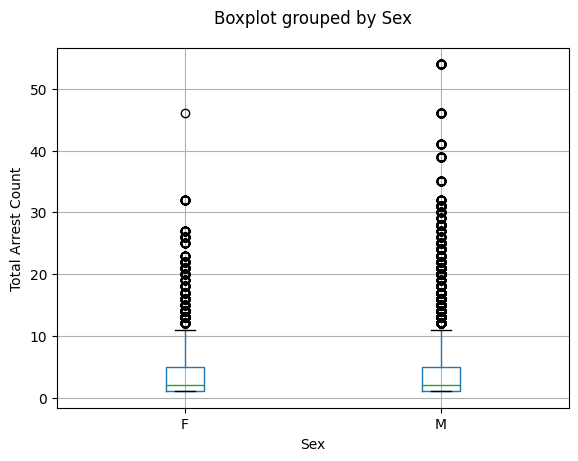

In [ ]:
#Create Box Plot for Arrest between different gender
SexArrest = df[['Sex', 'TotalArrests']]
plt.figure(figsize=(30, 24))
SexArrest.boxplot(by='Sex')
plt.xlabel('Sex')
plt.ylabel('Total Arrest Count')
plt.title('')
plt.show()

We observe that there exhibit significant different in arrest account in different genders.

# T Test 3 Age and Total Arrest

1.   List item
2.   List item



In [ ]:
# Using levene test to check equal varaince
stat, p = levene(df[df['Age_group__at_arrest_'] == 'Aged 25 to 34 years']['TotalArrests'], df[df['Age_group__at_arrest_'] == 'Aged 35 to 44 years']['TotalArrests'])

print(p)
#p value = 0.06 suggests equal variance

0.061093314405129995


In [ ]:
age_2534 = df[df['Age_group__at_arrest_'] == 'Aged 25 to 34 years']['TotalArrests']
age_3544 = df[df['Age_group__at_arrest_'] == 'Aged 35 to 44 years']['TotalArrests']

# conduct the two-sample t-test
t_stat, p_value = ttest_ind(age_2534, age_3544, equal_var=True)

# print the results
print("t-statistic: ", t_stat)
print("p-value: ", p_value)

t-statistic:  -2.7195361023993927
p-value:  0.006540390665738553


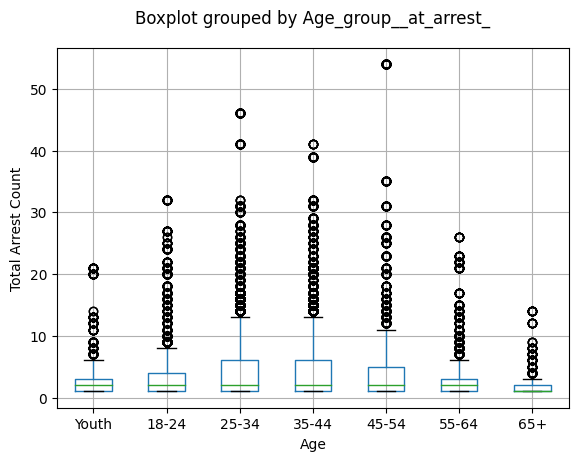

In [ ]:
#Create Box Plot for Arrest between different ages
AgeArrest = df[['Age_group__at_arrest_', 'TotalArrests']]
AgeArrest.boxplot(by='Age_group__at_arrest_')
plt.xlabel('Age')
plt.ylabel('Total Arrest Count')
plt.xticks(ticks=[1,2,3,4,5,6,7], labels=['Youth','18-24','25-34','35-44','45-54','55-64','65+'])
plt.title('')
plt.show()

We observe that there exhibit significant different in arrest account in 25-34 years old and 35 to 44 years old. 

# T Test 4 Strip Search and Race


In [ ]:
# Using levene test to check equal varaince
stat, p = levene(df_strip_search[df_strip_search['Perceived_Race'] == 'White']['StripSearch'], df_strip_search[df_strip_search['Perceived_Race'] == 'Indigenous']['StripSearch'])

print(p)
#Small p-value suggest not equal variance

0.0036482105652317297


In [ ]:
strip_data_white = df_strip_search[df_strip_search['Perceived_Race'] == 'White']['StripSearch']
strip_data_indigenous = df_strip_search[df_strip_search['Perceived_Race'] == 'Indigenous']['StripSearch']

# conduct the two-sample t-test
t_stat, p_value = ttest_ind(strip_data_white, strip_data_indigenous, equal_var=False)

# print the results
print("t-statistic: ", t_stat)
print("p-value: ", p_value)

t-statistic:  -2.225623430786722
p-value:  0.027426093768627386


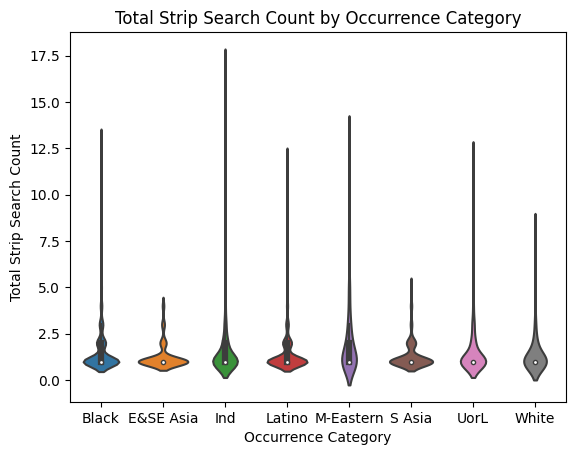

In [ ]:
#Create Violin Plot to visualize data
sns.violinplot(x='Perceived_Race', y='StripSearch', data=df_strip_search)
plt.xlabel('Occurrence Category')
plt.ylabel('Total Strip Search Count')
plt.title('Total Strip Search Count by Occurrence Category')
plt.xticks(ticks=[0,1,2,3,4,5,6,7], labels=['Black','E&SE Asia','Ind','Latino','M-Eastern','S Asia','UorL','White'])
plt.show()

\# T Test 5 Occurrence Category and Strip Search

In [ ]:
# Using levene test to check equal varaince
stat, p = levene(df_strip_search[df_strip_search['Occurrence_Category'] == 'Assault']['StripSearch'], df_strip_search[df_strip_search['Occurrence_Category'] == 'Compliance']['StripSearch'])

print(p)
#Small p-value suggest not equal variance

6.236284150632088e-05


In [ ]:
#Two sample t test on Assault and Complince
strip_data_assault = df_strip_search[df_strip_search['Occurrence_Category'] == 'Assault']['StripSearch']
strip_data_compliance = df_strip_search[df_strip_search['Occurrence_Category'] == 'Compliance']['StripSearch']

# conduct the two-sample t-test
t_stat, p_value = ttest_ind(strip_data_assault, strip_data_compliance, equal_var=False)

# print the results
print("t-statistic: ", t_stat)
print("p-value: ", p_value)

t-statistic:  -3.6030461218084784
p-value:  0.000326441575761461


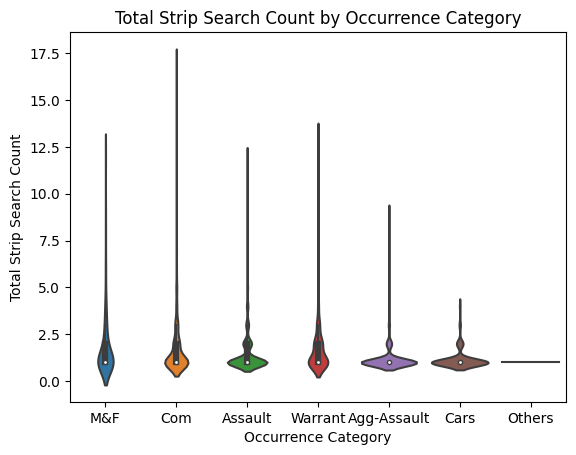

In [ ]:
#Violin plot of strip search by category
sns.violinplot(x='Occurrence_Category', y='StripSearch', data=df_strip_search)
plt.xlabel('Occurrence Category')
plt.ylabel('Total Strip Search Count')
plt.title('Total Strip Search Count by Occurrence Category')
plt.xticks(ticks=[0,1,2,3,4,5,6], labels=['M&F','Com','Assault','Warrant','Agg-Assault','Cars','Others'])

plt.show()

Text(0.5, 1.0, 'Box Plot of Total Arrests By Race and Sex')

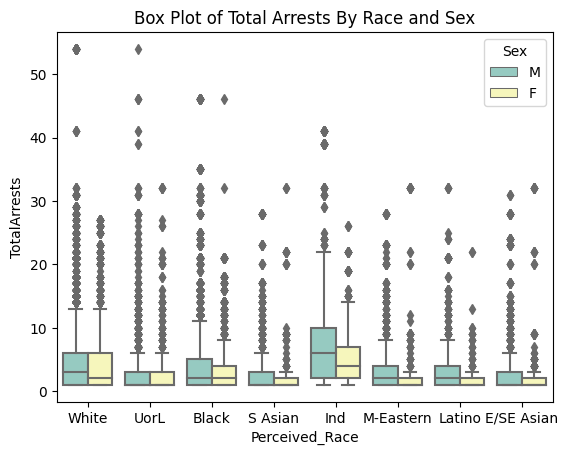

In [ ]:
# Model 1 EDA Checking with boxplots
sns.boxplot(x="Perceived_Race", y="TotalArrests", hue="Sex", data=df, palette="Set3") 
plt.xticks(ticks=[0,1,2,3,4,5,6,7], labels=['White','UorL','Black','S Asian','Ind','M-Eastern','Latino','E/SE Asian'])
plt.title('Box Plot of Total Arrests By Race and Sex')


Text(0.5, 1.0, 'Box Plot of Strip Search by Occurrence Category and Race')

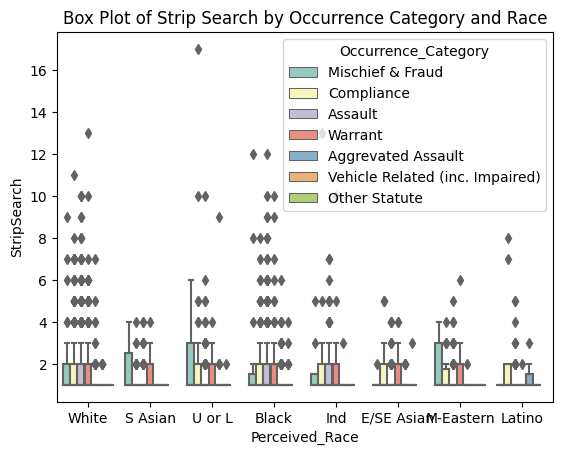

In [ ]:
# Model 2 EDA Checking with boxplots
sns.boxplot(x="Perceived_Race", y="StripSearch", hue="Occurrence_Category", data=df_strip_search, palette="Set3") 
plt.xticks(ticks=[0,1,2,3,4,5,6,7], labels=['White','S Asian','U or L','Black','Ind','E/SE Asian','M-Eastern','Latino'])
plt.title('Box Plot of Strip Search by Occurrence Category and Race')


Now moving on to ANOVA tests

In [ ]:
model1 = ols('TotalArrests ~ C(Sex, Treatment("M")) + C(Perceived_Race, Treatment("East/Southeast Asian")) + C(Perceived_Race, Treatment("East/Southeast Asian")):C(Sex, Treatment("M"))', data=df).fit()
sm.stats.anova_lm(model1, typ=2)


,sum_sq,df,F,PR(>F)
"C(Sex, Treatment(""M""))",2.436271e+03,1.0,86.290146,1.599788e-20
"C(Perceived_Race, Treatment(""East/Southeast Asian""))",5.844325e+04,7.0,295.714056,0.000000e+00
"C(Perceived_Race, Treatment(""East/Southeast Asian"")):C(Sex, Treatment(""M""))",3.473456e+03,7.0,17.575167,1.892058e-23
Residual,1.842150e+06,65247.0,NaN,NaN


# INTERACTION PLOT FOR ANOVA1

Text(0.5, 1.0, 'Interaction Plot of Perceived Race and Sex on Total Arrests')

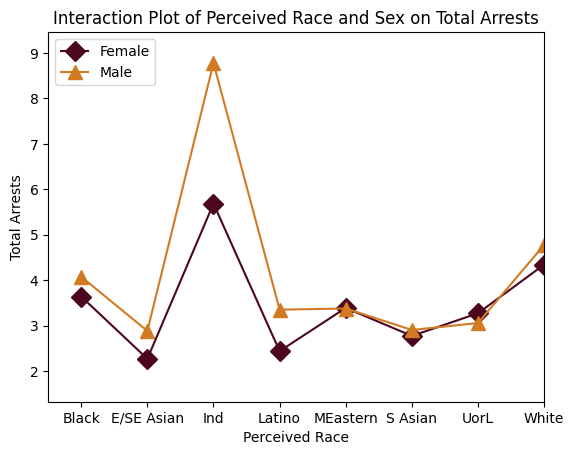

In [ ]:
#https://pbpython.com/categorical-encoding.html
# create a label encoder object
le = LabelEncoder()
# encode the Perceived_Race column
df['Perceived_Race_Encoded'] = le.fit_transform(df['Perceived_Race'])

interaction_plot(x=df['Perceived_Race_Encoded'], trace=df['Sex'], response=df['TotalArrests'], colors=['#4c061d','#d17a22'], markers=['D', '^'], ms=10)
plt.xlabel('Perceived Race')
plt.ylabel('Total Arrests')
plt.xticks(ticks=[0,1, 2,3,4,5,6,7], labels=['Black','E/SE Asian','Ind','Latino','MEastern','S Asian','UorL','White'])
plt.xlim([-0.5,7])
plt.legend(labels=['Female', 'Male'], loc='upper left')
plt.title('Interaction Plot of Perceived Race and Sex on Total Arrests')

# TUKEY HSD

In [ ]:
#https://towardsdatascience.com/anova-tukey-test-in-python-b3082b6e6bda
df = df.dropna(subset=['TotalArrests'])
df['Perceived_Race'] = pd.Categorical(df['Perceived_Race'])
df['Sex'] = pd.Categorical(df['Sex'])
perceived_race_categories = df['Perceived_Race'].cat.categories.astype(str)
sex_categories = df['Sex'].cat.categories.astype(str)
df['combination'] = df['Perceived_Race'].astype(str) + " / " + df['Sex'].astype(str)
sexrace_tuckey_interaction = pairwise_tukeyhsd(endog=df['TotalArrests'], groups=df['combination'], alpha=0.05)
print(sexrace_tuckey_interaction)

                   Multiple Comparison of Means - Tukey HSD, FWER=0.05                   
         group1                   group2          meandiff p-adj   lower    upper  reject
-----------------------------------------------------------------------------------------
               Black / F                Black / M   0.4357 0.0055   0.0645  0.8069   True
               Black / F East/Southeast Asian / F  -1.3703    0.0  -2.1289 -0.6118   True
               Black / F East/Southeast Asian / M  -0.7573    0.0  -1.2131 -0.3015   True
               Black / F           Indigenous / F   2.0462    0.0   1.2334  2.8589   True
               Black / F           Indigenous / M   5.1442    0.0   4.5298  5.7585   True
               Black / F               Latino / F  -1.2018 0.0446  -2.3918 -0.0119   True
               Black / F               Latino / M  -0.2888 0.9629  -0.8743  0.2967  False
               Black / F       Middle-Eastern / F  -0.2501    1.0  -1.2788  0.7787  False
          

In [ ]:
model2 = ols('StripSearch ~ C(Occurrence_Category, Treatment("Assault")) + C(Perceived_Race, Treatment("White")) + C(Perceived_Race, Treatment("White")):C(Occurrence_Category, Treatment("Assault"))', data=df_strip_search).fit()
sm.stats.anova_lm(model2, typ=2)


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 7, but rank is 1
  warnings.warn('covariance of constraints does not have full '
/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 42, but rank is 36
  warnings.warn('covariance of constraints does not have full '


,sum_sq,df,F,PR(>F)
"C(Occurrence_Category, Treatment(""Assault""))",126.939010,6.0,14.701590,1.013147e-16
"C(Perceived_Race, Treatment(""White""))",84.705120,7.0,8.408763,3.750455e-03
"C(Perceived_Race, Treatment(""White"")):C(Occurrence_Category, Treatment(""Assault""))",42.732268,42.0,0.707013,9.043336e-01
Residual,7186.676103,4994.0,NaN,NaN


Text(0.5, 1.0, 'Interaction Plot of Perceived Race and Occurrence Type on Strip Search Counts')

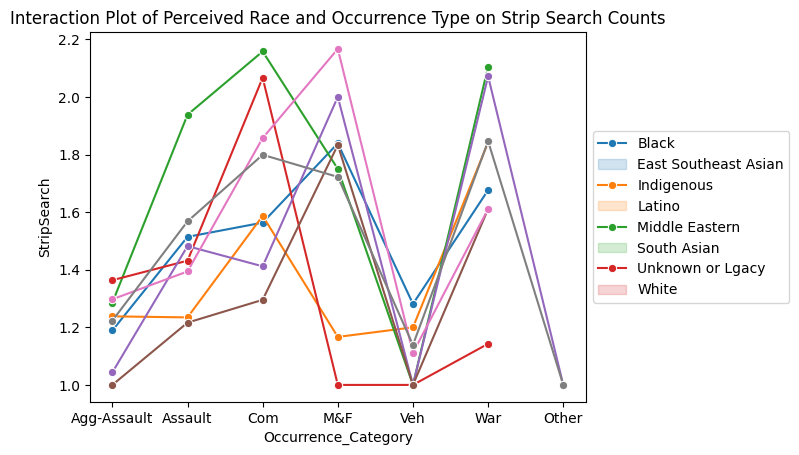

In [ ]:
df_grouped = df_strip_search.groupby(['Perceived_Race', 'Occurrence_Category'])['StripSearch'].mean().reset_index()
sns.lineplot(data=df_grouped, x='Occurrence_Category', y='StripSearch', hue='Perceived_Race', marker='o')
plt.legend(labels=['Black', 'East Southeast Asian', 'Indigenous', 'Latino', 'Middle Eastern', 'South Asian', 'Unknown or Lgacy', 'White'], loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(ticks=[0,1, 2,3,4,5,6], labels=['Agg-Assault','Assault','Com','M&F','Veh','War','Other'])
plt.title('Interaction Plot of Perceived Race and Occurrence Type on Strip Search Counts')


Perform TUKEY HSD

In [ ]:
df_strip_search['Perceived_Race'] = df_strip_search['Perceived_Race'].astype(str)
df_strip_search['Occurrence_Category'] = df_strip_search['Occurrence_Category'].astype(str)
df_strip_search['combination'] = df_strip_search.Perceived_Race + " / " + df_strip_search.Occurrence_Category
tuckey_interaction = pairwise_tukeyhsd(endog=df_strip_search['StripSearch'], groups=df_strip_search['combination'], alpha=0.05)
print(tuckey_interaction)

/usr/local/lib/python3.9/dist-packages/scipy/integrate/_quadpack_py.py:1225: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


                                                Multiple Comparison of Means - Tukey HSD, FWER=0.05                                                 
                        group1                                                 group2                         meandiff p-adj   lower   upper  reject
----------------------------------------------------------------------------------------------------------------------------------------------------
                            Black / Aggrevated Assault                                        Black / Assault    0.325 0.0678 -0.0072  0.6572  False
                            Black / Aggrevated Assault                                     Black / Compliance   0.3745 0.2329 -0.0527  0.8017  False
                            Black / Aggrevated Assault                               Black / Mischief & Fraud   0.6496 0.7656 -0.2625  1.5617  False
                            Black / Aggrevated Assault                Black / Vehicle Related (inc. Impair

In [ ]:
df_strip_search
df

,ArrestID,PersonID,Perceived_Race,Sex,Age_group__at_arrest_,Youth_at_arrest__under_18_years,StripSearch,Booked,Occurrence_Category,SearchReason_CauseInjury,SearchReason_AssistEscape,SearchReason_PossessWeapons,SearchReason_PossessEvidence,TotalArrests,Perceived_Race_Encoded,combination
0,6017884.0,326622,White,M,Aged 35 to 44 years,Not a youth,0,1,Assault,NaN,NaN,NaN,NaN,3,7,White / M
1,6056669.0,326622,White,M,Aged 35 to 44 years,Not a youth,0,1,Assault,NaN,NaN,NaN,NaN,3,7,White / M
2,6057065.0,326622,Unknown or Legacy,M,Aged 35 to 44 years,Not a youth,0,1,Assault,NaN,NaN,NaN,NaN,3,6,Unknown or Legacy / M
3,6029059.0,327535,Black,M,Aged 25 to 34 years,Not a youth,0,0,Assault,NaN,NaN,NaN,NaN,3,0,Black / M
4,6040372.0,327535,South Asian,M,Aged 25 to 34 years,Not a youth,0,1,Compliance,NaN,NaN,NaN,NaN,3,5,South Asian / M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65271,6044336.0,316123,Indigenous,F,Aged 25 to 34 years,Not a youth,0,0,Vehicle Related (inc. Impaired),NaN,NaN,NaN,NaN,1,2,Indigenous / F
65272,6031692.0,307736,South Asian,M,Aged 35 to 44 years,Not a youth,0,1,Assault,NaN,NaN,NaN,NaN,1,5,South Asian / M
65273,6064396.0,324057,White,F,Aged 45 to 54 years,Not a youth,0,0,Assault,NaN,NaN,NaN,NaN,1,7,White / F
65274,6008662.0,331870,Unknown or Legacy,M,Aged 17 years and younger,Youth (aged 17 years and under),0,0,Assault,NaN,NaN,NaN,NaN,1,6,Unknown or Legacy / M


# End-Term

In [ ]:
df = dataset.copy()

In [ ]:
df_end_term = df.copy()
subset = df_end_term.loc[(df["StripSearch"] == 1), ["Perceived_Race", "Occurrence_Category", "StripSearch", "Actions_at_arrest___Cooperative"]]
grouped_subset = subset.groupby(["Perceived_Race", "Occurrence_Category"]).agg({"StripSearch": lambda x: sum(x == 1), "Actions_at_arrest___Cooperative": "mean"})
grouped_subset = grouped_subset.rename(columns={"StripSearch": "StripSearchCount", "Actions_at_arrest___Cooperative": "MeanCoop"})
grouped_subset = grouped_subset.reset_index()
grouped_subset.head(165)

,Perceived_Race,Occurrence_Category,StripSearchCount,MeanCoop
0,Black,Assault,33,0.242424
1,Black,Assault & Other crimes against persons,453,0.300221
2,Black,Break & Enter,55,0.454545
3,Black,Break and Enter,3,1.000000
4,Black,Drug Related,380,0.460526
...,...,...,...,...
160,White,Sexual Related Crimes & Crimes Against Children,26,0.653846
161,White,Vehicle Related (inc. Impaired),40,0.575000
162,White,Warrant,448,0.517857
163,White,Weapons,20,0.400000


In [ ]:
#Is there a significant difference in stripsearch count between different races when controlling for cooperative mean during arrest?
#Is there a significant difference in stripsearch count between different occurence categories when controlling for cooperative mean during arrest? 

In [ ]:
eda_grouped_subset = grouped_subset.groupby(["Perceived_Race"])['StripSearchCount'].sum()
eda_grouped_subset.head(165)

Perceived_Race
Black                   2434
East/Southeast Asian     341
Indigenous               306
Latino                   132
Middle-Eastern           228
South Asian              257
Unknown or Legacy        535
White                   3566
Name: StripSearchCount, dtype: int64

In [ ]:
eda_grouped_subset1 = grouped_subset.groupby(["Occurrence_Category"])['StripSearchCount'].sum()
eda_grouped_subset1.head(165)

Occurrence_Category
Assault                                             104
Assault & Other crimes against persons             1427
Break & Enter                                       424
Break and Enter                                      35
Drug Related                                       1077
FTA/FTC, Compliance Check & Parollee               1240
FTA/FTC/Compliance Check/Parollee                    90
Fraud                                                 1
Harassment & Threatening                            261
Harassment/Threatening                                9
Homicide                                              3
Impaired                                              7
LLA                                                   1
Mental Health                                         2
Mischief                                             20
Mischief & Fraud                                    247
Other Offence                                       254
Other Statute               

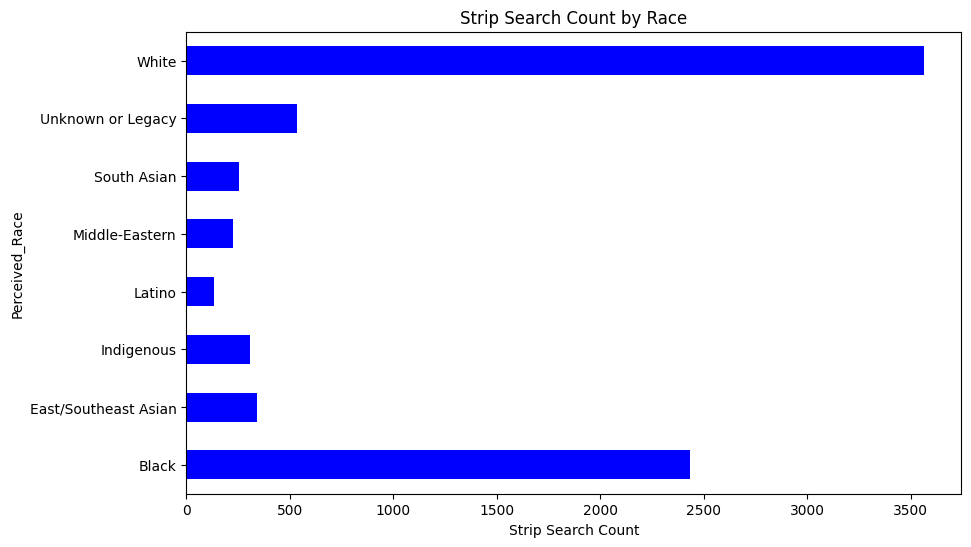

In [ ]:
ax = eda_grouped_subset.plot.barh(figsize=(10, 6), color="blue")
ax.set_xlabel("Strip Search Count")
ax.set_title("Strip Search Count by Race")
plt.show()

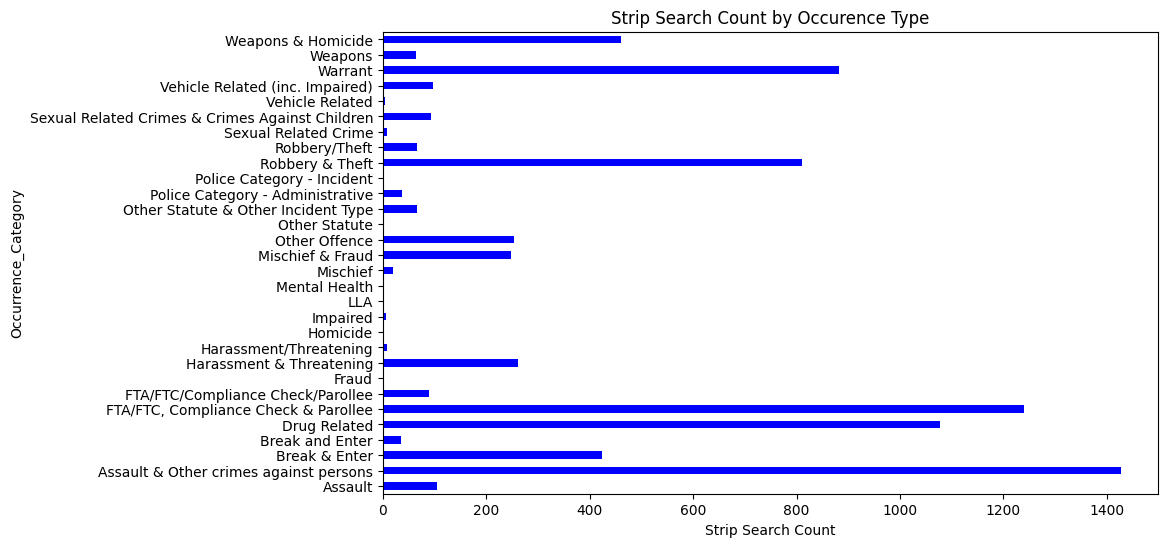

In [ ]:
ax = eda_grouped_subset1.plot.barh(figsize=(10, 6), color="blue")
ax.set_xlabel("Strip Search Count")
ax.set_title("Strip Search Count by Occurence Type")
plt.show()

In [ ]:
grouped_subset

,Perceived_Race,Occurrence_Category,StripSearchCount,MeanCoop
0,Black,Assault,33,0.242424
1,Black,Assault & Other crimes against persons,453,0.300221
2,Black,Break & Enter,55,0.454545
3,Black,Break and Enter,3,1.000000
4,Black,Drug Related,380,0.460526
...,...,...,...,...
160,White,Sexual Related Crimes & Crimes Against Children,26,0.653846
161,White,Vehicle Related (inc. Impaired),40,0.575000
162,White,Warrant,448,0.517857
163,White,Weapons,20,0.400000


In [ ]:
rg_white = grouped_subset.query("Perceived_Race == 'White'")
group1 = rg_white['StripSearchCount']

rg_not_white = grouped_subset.query("Perceived_Race != 'White'")
group2 = rg_not_white['StripSearchCount']

In [ ]:
def pooled_standard_deviation(sample1,sample2):
    #calculate the sample size
    n1, n2 = len(sample1), len(sample2)
    #calculate the variances
    var1, var2 = np.var(sample1, ddof=1), np.var(sample2, ddof=1)
    #calculate the pooled standard deviation
    numerator = ((n1-1) * var1) + ((n2-1) * var2)
    denominator = n1+n2-2
    return np.sqrt(numerator/denominator)

# function to calculate Cohen's d for independent samples
def Cohens_d(sample1, sample2):
    u1, u2 = np.mean(sample1), np.mean(sample2)
    s_pooled = pooled_standard_deviation(sample1, sample2)
    #print(s_pooled)
    return ((u1 - u2) / s_pooled)

In [ ]:
from statsmodels.stats.power import TTestIndPower
effect_size = Cohens_d(group1,group2)
alpha = 0.05
power = 0.8
ratio_ =len(group1)/len(group2) #NB: ratio = nobs2/nobs1
print('Effect size (Cohen\'s D) for race:',effect_size)

analysis = TTestIndPower()
sample_size = analysis.solve_power(effect_size, power=power, nobs1=None, ratio=ratio_, alpha=alpha)
# required sample size for power of 80%
print('Sample Size of nobs1: %.3f' % sample_size, 'needed for white')
print('Actual size of GT3_G3:', len(group1))
nobs2 =ratio_*sample_size
print('Sample Size of nobs2: %.3f' % nobs2, 'needed for non-white')
print('Actual size of LE3_G3:', len(group2))

Effect size (Cohen's D) for race: 1.0276217478431044
Sample Size of nobs1: 47.083 needed for white
Actual size of GT3_G3: 27
Sample Size of nobs2: 9.212 needed for non-white
Actual size of LE3_G3: 138


In [ ]:
# Weapons & Homicide
# Weapons
wh = grouped_subset.query("Occurrence_Category == 'Weapons & Homicide'")
oc_group1 = wh['StripSearchCount']

w = grouped_subset.query("Occurrence_Category == 'Weapons'")
oc_group2 = w['StripSearchCount']

In [ ]:
from statsmodels.stats.power import TTestIndPower
effect_size = Cohens_d(oc_group1,oc_group2)
alpha = 0.05
power = 0.8
ratio_ =len(oc_group1)/len(oc_group2) #NB: ratio = nobs2/nobs1
print('Effect size (Cohen\'s D) for occurance category:',effect_size)

analysis = TTestIndPower()
sample_size = analysis.solve_power(effect_size, power=power, nobs1=None, ratio=ratio_, alpha=alpha)
# required sample size for power of 80%
print('Sample Size of nobs1: %.3f' % sample_size, 'needed for Weapons & Homicide')
print('Actual size of GT3_G3:', len(oc_group1))
nobs2 =ratio_*sample_size
print('Sample Size of nobs2: %.3f' % nobs2, 'needed for Weapons')
print('Actual size of LE3_G3:', len(oc_group2))

Effect size (Cohen's D) for occurance category: 0.5940619606392012
Sample Size of nobs1: 34.013 needed for Weapons & Homicide
Actual size of GT3_G3: 8
Sample Size of nobs2: 68.026 needed for Weapons
Actual size of LE3_G3: 4


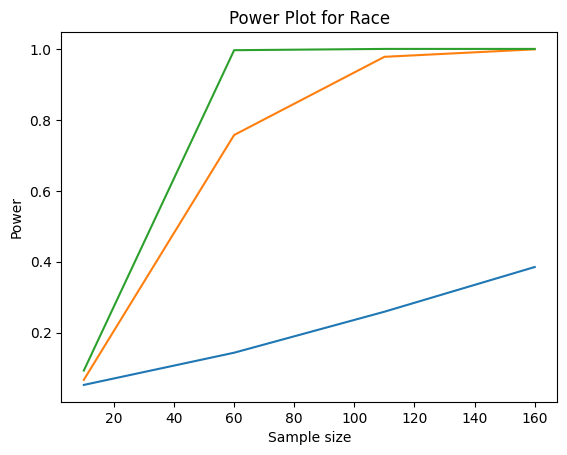

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.stats.power import FTestAnovaPower

alpha = 0.05
n = np.arange(10, 165, 50)
effect_size = np.array([0.2, 0.5, 0.8])
k = 8 

power = []
for i in n:
    res = FTestAnovaPower().power(effect_size=effect_size, nobs=i, alpha=alpha, k_groups=k)
    power.append(res)

plt.plot(n, power)
plt.xlabel('Sample size')
plt.ylabel('Power')
plt.title('Power Plot for Race')
plt.show()

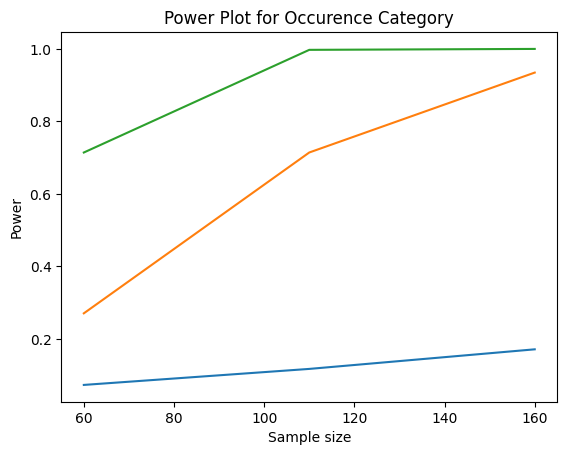

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.stats.power import FTestAnovaPower

alpha = 0.05
n = np.arange(10, 165, 50)
effect_size = np.array([0.2, 0.5, 0.8])
k = 32 

power = []
for i in n:
    res = FTestAnovaPower().power(effect_size=effect_size, nobs=i, alpha=alpha, k_groups=k)
    power.append(res)

plt.plot(n, power)
plt.xlabel('Sample size')
plt.ylabel('Power')
plt.title('Power Plot for Occurence Category')
plt.show()

Cohen's D and sample Size for PErceived Race and Occurence Category 

Ancova & Logistic Regression

In [ ]:
!pip install pingouin

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.6/198.6 kB 8.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7048 sha256=d12eb0cd784aeb848fee44c02e3c209d2d91153f33e7f1e9af172bc54a155625
  Stored in directory: /root/.cache/pip/wheels/04/bb/0d/2d02ec45f29c48d6192476bfb59c5a0e64b605e7212374dd15
Successfully built littleutils


In [ ]:
from pingouin import ancova

ancova(data=grouped_subset, dv='StripSearchCount', covar='MeanCoop', between='Perceived_Race')

# interpretation
# alternate hypothesis is true; there is significant difference between strip search count for different races when controlling for mean coop
# mean coop does not have effect on the strip search count

,Source,SS,DF,F,p-unc,np2
0,Perceived_Race,3.784826e+05,7,5.870623,0.000005,0.208501
1,MeanCoop,5.874091e+02,1,0.063779,0.800952,0.000409
2,Residual,1.436773e+06,156,NaN,NaN,NaN


In [ ]:
ancova(data=grouped_subset, dv='StripSearchCount', covar='MeanCoop', between='Occurrence_Category')

# interpretation
# alternate hypothesis is true; there is significant difference between strip search count for different Occurrence_Category when controlling for mean coop
# mean coop does not have effect on the strip search count

,Source,SS,DF,F,p-unc,np2
0,Occurrence_Category,4.839960e+05,29,1.679909,0.025948,0.266627
1,MeanCoop,3.943241e+03,1,0.396913,0.529761,0.002953
2,Residual,1.331260e+06,134,NaN,NaN,NaN


## Logistic Regression

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
log_reg = dataset.copy()
predictors = dataset[['Arrest_Year', 'Arrest_Month', 'Perceived_Race', 'Sex',
       'Youth_at_arrest__under_18_years', 'Occurrence_Category']]

target = dataset['StripSearch']

predictors['Occurrence_Category'] = predictors['Occurrence_Category'].fillna('Other Statute')
predictors['Perceived_Race'] = predictors['Perceived_Race'].fillna('Unknown or Legacy')

<ipython-input-59-6fd2d861af9b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predictors['Occurrence_Category'] = predictors['Occurrence_Category'].fillna('Other Statute')
<ipython-input-59-6fd2d861af9b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predictors['Perceived_Race'] = predictors['Perceived_Race'].fillna('Unknown or Legacy')


In [ ]:
predictors.isna().sum()

Arrest_Year                        0
Arrest_Month                       0
Perceived_Race                     0
Sex                                0
Youth_at_arrest__under_18_years    0
Occurrence_Category                0
dtype: int64

In [ ]:
import statsmodels.formula.api as smf
from sklearn.linear_model import LogisticRegression

seed = 100
x_train, x_test, y_train, y_test = train_test_split(predictors, target, test_size=0.2, random_state=seed, stratify=target)

all_col = ' + '.join(predictors)
formula = "StripSearch ~ " + all_col
print('Formula: ', formula)
print('\n')

training_data = pd.concat([x_train, y_train], axis=1)
model = smf.logit(formula, training_data).fit()
print(model.summary())

Formula:  StripSearch ~ Arrest_Year + Arrest_Month + Perceived_Race + Sex + Youth_at_arrest__under_18_years + Occurrence_Category


         Current function value: 0.262890
         Iterations: 35


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                           Logit Regression Results                           
Dep. Variable:            StripSearch   No. Observations:                52220
Model:                          Logit   Df Residuals:                    52174
Method:                           MLE   Df Model:                           45
Date:                Fri, 14 Apr 2023   Pseudo R-squ.:                  0.2816
Time:                        21:10:09   Log-Likelihood:                -13728.
converged:                      False   LL-Null:                       -19110.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                                                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                               4792.9328    188.5

Train accuracy:  0.8891229414017617
Train set confusion matrix: 
 [[45294   685]
 [ 5105  1136]]


1136 685 5105 45294


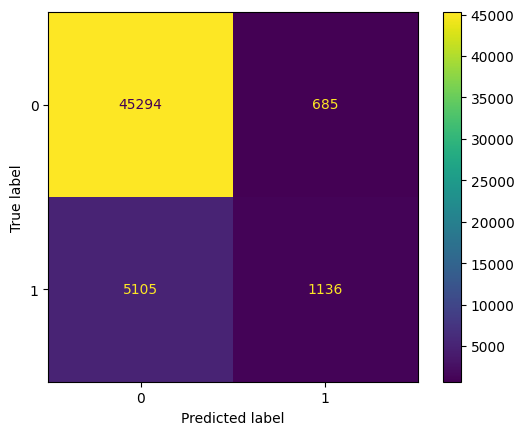

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

ypred_train = model.predict(x_train)
pred_train = list(map(round, ypred_train))
print('Train accuracy: ', accuracy_score(y_train, pred_train))

conf_mat = confusion_matrix(y_train, pred_train)
print('Train set confusion matrix: \n', conf_mat)
print('\n')
ConfusionMatrixDisplay.from_predictions(y_train, pred_train)

tn, fp, fn, tp = confusion_matrix(y_train, pred_train).ravel()
print(tp, fp, fn, tn)

Test accuracy:  0.8909313725490197
Test set confusion matrix: 
 [[11327   169]
 [ 1255   305]]




305 169 1255 11327


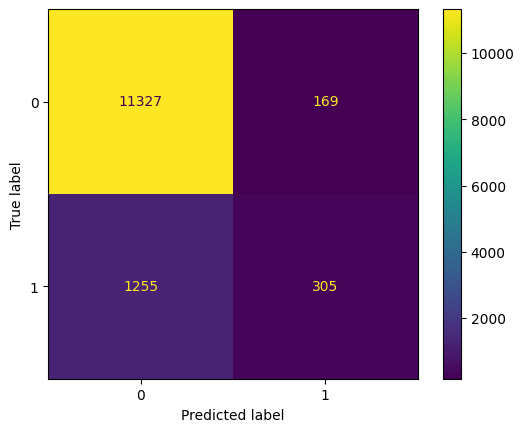

In [ ]:
ypred_test = model.predict(x_test)
pred_test = list(map(round, ypred_test))
print('Test accuracy: ', accuracy_score(y_test, pred_test))

conf_mat_test = confusion_matrix(y_test, pred_test)
print('Test set confusion matrix: \n', conf_mat_test)

print('\n')
ConfusionMatrixDisplay.from_predictions(y_test, pred_test)

print('\n')
tn, fp, fn, tp = confusion_matrix(y_test, pred_test).ravel()
print(tp, fp, fn, tn)

In [ ]:
# odds ratio
np.exp(model.params)

/usr/local/lib/python3.9/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


Intercept                                                                          inf
Arrest_Month[T.Jan-Mar]                                                   1.351189e+00
Arrest_Month[T.July-Sept]                                                 1.027734e+00
Arrest_Month[T.Oct-Dec]                                                   1.680696e-01
Perceived_Race[T.East/Southeast Asian]                                    5.423265e-01
Perceived_Race[T.Indigenous]                                              1.297956e+00
Perceived_Race[T.Latino]                                                  5.662851e-01
Perceived_Race[T.Middle-Eastern]                                          4.885622e-01
Perceived_Race[T.South Asian]                                             4.908721e-01
Perceived_Race[T.Unknown or Legacy]                                       6.577598e-01
Perceived_Race[T.White]                                                   9.440905e-01
Sex[T.M]                                   

Optimization terminated successfully.
         Current function value: 0.365906
         Iterations 6


Text(0.5, 1.0, 'Plot for Prediction Interval')

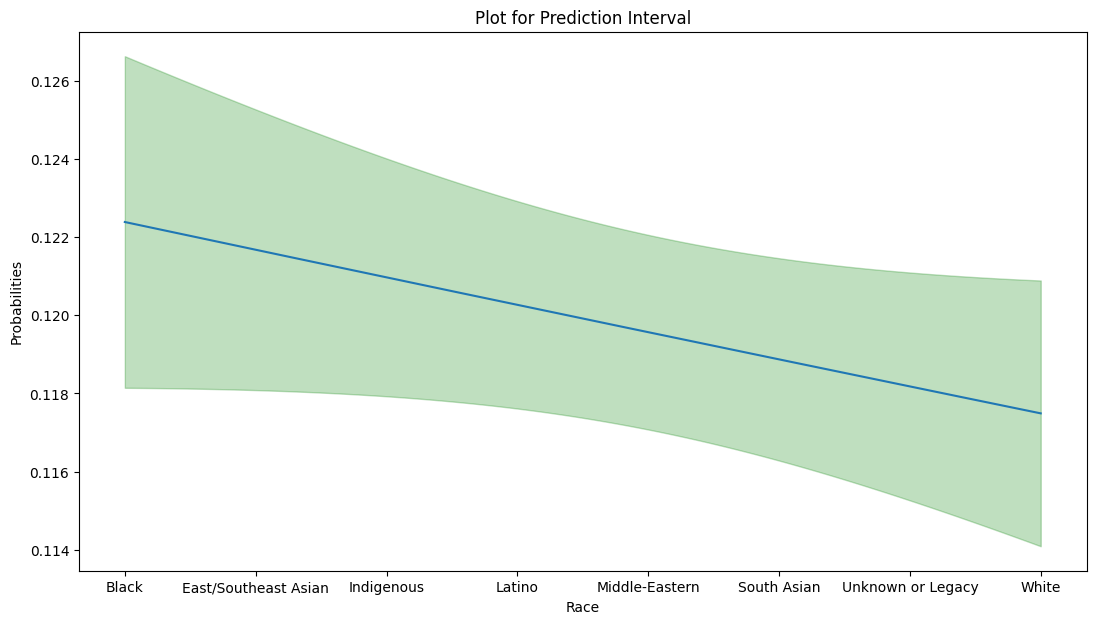

In [ ]:
pi_df = dataset.copy()

from scipy import stats
from sklearn.preprocessing import LabelEncoder

pi_df = pi_df[pi_df['Perceived_Race'].isnull() != True]

le = LabelEncoder()
pi_df['Perceived_Race'] = le.fit_transform(pi_df["Perceived_Race"])


mod = sm.Logit.from_formula('StripSearch ~ Perceived_Race', pi_df)
res = mod.fit()
me = res.get_margeff()

Λ = lambda x: stats.logistic().cdf(x)
λ = lambda x: stats.logistic().pdf(x)

β_ = res.params.values.reshape(-1, 1)
V_ = res.cov_params().values

def var_π(x, β, V_):
    prob = λ(x.T.dot(β))**2 * x.T.dot(V_).dot(x)
    return prob

def var_πs(xx, β, V_):
    α = λ(xx.dot(β))**2
    out = np.empty((500, 1))
    for i, x in enumerate(xx):
        out[i] = x.T.dot(V_).dot(x)
    return α * out

xx = sm.add_constant(np.linspace(pi_df.Perceived_Race.min(), pi_df.Perceived_Race.max(), 500).reshape(-1, 1))
πs = Λ(xx.dot(β_))
vv = np.sqrt(var_πs(xx, β_, V_))

x = ['Black', 'East/Southeast Asian', 'Indigenous', 'Latino', 'Middle-Eastern', 'South Asian', 'Unknown or Legacy', 'White']
default_x_ticks = range(len(x))

plt.rcParams['figure.figsize'] = [13, 7]
plt.plot(xx[:, 1], πs)
plt.fill_between(xx[:, 1], (πs - 1.96*vv).ravel(), (πs + 1.96*vv).ravel(), alpha=.25, color='g')
plt.xticks(default_x_ticks, x)
plt.xlabel('Race')
plt.ylabel('Probabilities')
plt.title('Plot for Prediction Interval')